# Quick overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from collections import Counter

path = '/Users/mac/Desktop/Kaggle_datasets/Titanic/train.csv'
df = pd.read_csv(path)
df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### df.info()

In [116]:
df.info() #一眼看去，不到800的有NaN的值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### from collections import Counter

In [117]:
from collections import Counter
counts_sex = Counter(df.Sex)
print(counts_sex.most_common(10)) #回傳前10多的數值

counts_Survived = Counter(df.Survived)
print(counts_Survived.most_common(10)) #回傳前10多的數值

[('male', 577), ('female', 314)]
[(0, 549), (1, 342)]


In [118]:
df.Name[:10] #回傳該欄位前10筆資料

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

### value_counts()

In [119]:
df['Age'].value_counts().head(n=10) #回傳該欄位數值的個數，由大到小前n筆

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
28.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

### fillna('', inplace=True)

In [120]:
df.Cabin.fillna('Missing', inplace = True) #inplace才會真的改變df
df.Cabin.value_counts().head() #可以看到大缺特缺

Missing        687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
Name: Cabin, dtype: int64

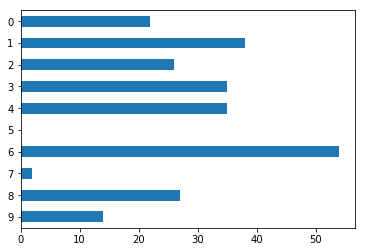

In [121]:
df.Age[9::-1].plot(kind='barh', rot=0) #，按照ID順序排列, barh = bar horizontal
plt.show()

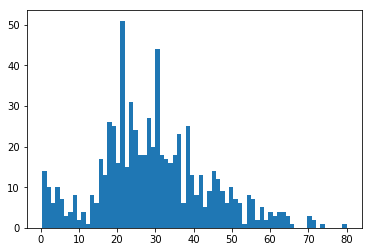

In [122]:
df.Age.dropna(inplace = True) #拿掉NaN才可以畫圖
plt.hist(df.Age, bins=70)
plt.show()

### groupby('A','B')

In [123]:
#這個方法可以做出confusion matrix的效果...
by_sex_01 = df.groupby(['Sex', 'Survived'])
sex_counts = by_sex_01.size().unstack().fillna(0)
sex_counts

Survived,0,1
Sex,,
female,81,233
male,468,109


In [124]:
df.groupby('Sex').Survived

In [125]:
df.groupby('Sex').Survived.sum() #性別存活數目加總

Sex
female    233
male      109
Name: Survived, dtype: int64

In [126]:
df.groupby('Sex').Survived.mean() #性別存活數目比例，因為是0和1的數據集

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### pivot_table(目標分析, index='', columns='', aggfunc = 執行函數)

In [127]:
#用index和column分割全組，回傳func(目標欄位)
count_analysis1 = df.pivot_table('Survived', index='Embarked', columns='Sex', aggfunc = mean)
count_analysis1

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


In [128]:
count_analysis2 = df.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc = mean)
count_analysis2

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


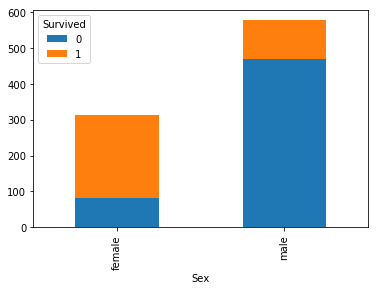

In [129]:
sex_counts.plot(kind='bar',stacked=True)

### confusion_matrix .div( confusion_matrix .sum(1), axis=0)

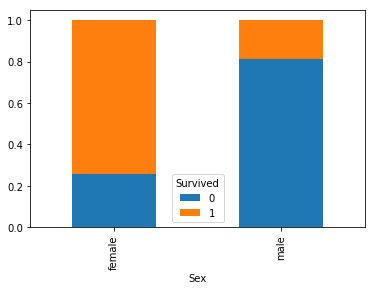

In [130]:
#把總合都變成1（100%），才看的出相對分佈比例
normed_sex = sex_counts.div(sex_counts.sum(1), axis=0)
normed_sex.plot(kind='bar',stacked=True)

In [131]:
by_Embarked_01 = df.groupby(['Embarked', 'Survived'])
Embarked_counts = by_Embarked_01.size().unstack().fillna(0)
Embarked_counts

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


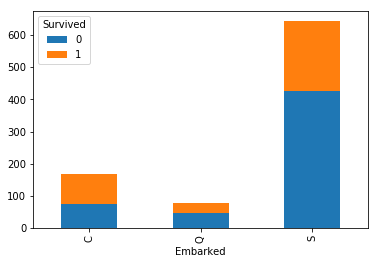

In [132]:
Embarked_counts.plot(kind='bar',stacked=True)

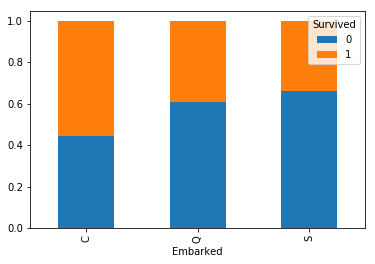

In [133]:
#把總合都變成1（100%），才看的出相對分佈比例
normed_Embarked = Embarked_counts.div(Embarked_counts.sum(1), axis=0)
normed_Embarked.plot(kind='bar',stacked=True)

### df.sort_values(by='')

In [134]:
df.sort_values(by='Age')[0:5] #按照某的columns重新sort df順序

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,Missing,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,Missing,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,Missing,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,Missing,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,Missing,S


### 

(array([ 0.04137931,  0.05172414,  0.06896552,  0.09310345,  0.10689655,
         0.1137931 ,  0.11724138,  0.12413793,  0.13103448,  0.13103448,
         0.13448276,  0.13793103,  0.14482759,  0.15517241,  0.16896552,
         0.18965517,  0.21034483,  0.24137931,  0.27241379,  0.28275862,
         0.3       ,  0.33793103,  0.35517241,  0.40689655,  0.42758621,
         0.44827586,  0.4862069 ,  0.51034483,  0.53793103,  0.57241379,
         0.6       ,  0.63103448,  0.65517241,  0.67586207,  0.7137931 ,
         0.75172414,  0.75517241,  0.77241379,  0.78965517,  0.81034483,
         0.81724138,  0.83793103,  0.84137931,  0.85172414,  0.86896552,
         0.86896552,  0.87241379,  0.89310345,  0.90689655,  0.92413793,
         0.93103448,  0.94137931,  0.94482759,  0.95517241,  0.95862069,
         0.96551724,  0.96551724,  0.97586207,  0.97586207,  0.98275862,
         0.98275862,  0.98965517,  0.99655172,  0.99655172,  0.99655172,
         0.99655172,  0.99655172,  0.99655172,  0.9

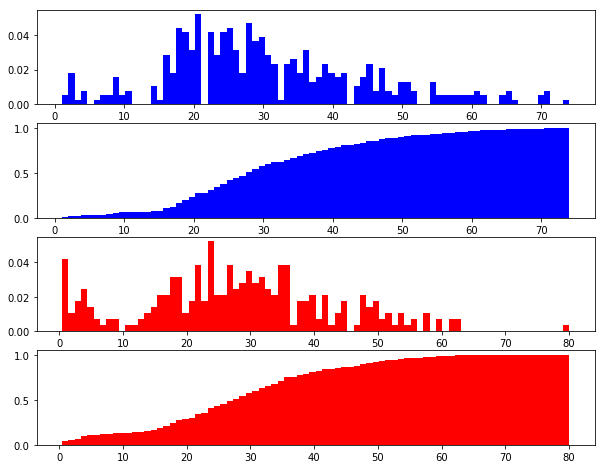

In [162]:
#按照survived來畫age的分佈

figsize=(10,8)
fig = plt.figure(figsize=figsize)

ax1 = plt.subplot2grid((4,1),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((4,1),(1,0), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((4,1),(2,0), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((4,1),(3,0), rowspan=1, colspan=1)

#死亡概率分佈密度
ax1.hist(df.Age[df.Survived==0], bins=80, color = 'b', normed=True) #normed自動變成加總為1
#死亡累積概率密度分佈
ax2.hist(df.Age[df.Survived==0], bins=80, color = 'b', normed=True, cumulative = True) #normed自動變成加總為1
#存活概率分佈密度
ax3.hist(df.Age[df.Survived==1], bins=80, color = 'r', normed=True) #normed自動變成加總為1
#存活累積概率密度分佈
ax4.hist(df.Age[df.Survived==1], bins=80, color = 'r', normed=True, cumulative = True) #normed自動變成加總為1

# Numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [163]:
np.zeros(10) #注意都是float64

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [165]:
np.zeros((3,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [169]:
np.ones((3,6))

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [166]:
np.empty((3,6)) #傳回一堆垃圾，只分配內存空間

array([[  0.00000000e+000,   0.00000000e+000,   2.15894033e-314,
          2.15896939e-314,   2.15896919e-314,   2.15896914e-314],
       [  2.15896925e-314,   2.15896917e-314,   2.15896911e-314,
          2.15896908e-314,   2.48273508e-312,   2.05833592e-312],
       [  2.05833592e-312,   2.29175545e-312,   2.07955588e-312,
          2.14321575e-312,   5.60124131e-309,   1.26627998e-308]])

In [167]:
np.arange(15) #像range一樣

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [172]:
np.identity(5) #單位矩陣

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### astype會創造拷貝出新數組

In [173]:
np.arange(15).astype(float32) #int轉換成float，可以跟C串接

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.], dtype=float32)

In [179]:
np.arange(15).astype(string_) #也可以轉成字串

array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10',
       b'11', b'12', b'13', b'14'],
      dtype='|S21')

### 四則運算

In [204]:
arr = np.arange(1,10)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [205]:
arr**2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

In [206]:
arr-arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [207]:
1/arr  #運用到廣播broadcasting特性

array([ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ,
        0.16666667,  0.14285714,  0.125     ,  0.11111111])

### slice

In [211]:
arr_slice = arr[2:5]
arr_slice[:] = 100 #會直接更改原本的array，不像list只是更改copy的部分
arr 

array([  1,   2, 100, 100, 100,   6,   7,   8,   9])

In [212]:
arr_slice2 = arr[2:5].copy() #不想更改到原本檔案的話要用copy.()，但是會消耗大量內存
arr_slice2[:] = 200 
print(arr_slice2)
print(arr) 

[200 200 200]
[  1   2 100 100 100   6   7   8   9]


In [215]:
arr2D = np.arange(1,10).reshape(3,3)
arr2D

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [217]:
arr2D[0]

array([1, 2, 3])

In [216]:
arr2D[0][1]

2

In [218]:
arr2D[:,2]

array([3, 6, 9])

In [220]:
arr2D[1,:]

array([4, 5, 6])

### boolean條件索引，會返回的是copy數組喔！！

In [255]:
random.seed(42)
names = np.array(['a','b','c','d'])
data = np.random.randn(4,3) #(0,1)的常態分佈數組

In [256]:
names

array(['a', 'b', 'c', 'd'],
      dtype='<U1')

In [257]:
names == 'a'

array([ True, False, False, False], dtype=bool)

In [258]:
data

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [259]:
data [names=='a'] #用a來索引，同data[0, :]

array([[ 0.49671415, -0.1382643 ,  0.64768854]])

In [260]:
data [names=='a', -1]

array([ 0.64768854])

In [261]:
data [names!='a']

array([[ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [262]:
condition = (names=='b') | (names=='d')
data[condition]

array([[ 1.52302986, -0.23415337, -0.23413696],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [263]:
data[data<0] = 0
data

array([[ 0.49671415,  0.        ,  0.64768854],
       [ 1.52302986,  0.        ,  0.        ],
       [ 1.57921282,  0.76743473,  0.        ],
       [ 0.54256004,  0.        ,  0.        ]])

### fancy index

In [284]:
arr = np.arange(100).reshape(10,10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [285]:
arr [[0,1,2,3], [2,3,4,5]]  #等同於尋找arr[0][1]和arr[1][2]

array([ 2, 13, 24, 45])

In [290]:
arr [[0,1,2,3]] [:,[2,3,4,5,6]] #2D選取

array([[ 2,  3,  4,  5,  6],
       [12, 13, 14, 15, 16],
       [22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36]])

In [291]:
arr [np.ix_([2,3,4,5],[2,3,4,5,6])] #2D選取

array([[22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46],
       [52, 53, 54, 55, 56]])

### transpose

In [307]:
arr = np.arange(10).reshape(2,5)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [308]:
arr.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [309]:
#矩陣相乘
np.dot(arr.T, arr)

array([[25, 30, 35, 40, 45],
       [30, 37, 44, 51, 58],
       [35, 44, 53, 62, 71],
       [40, 51, 62, 73, 84],
       [45, 58, 71, 84, 97]])

### universal function = u func

In [310]:
arr = np.arange(10)

In [311]:
np.power(arr, 1/3)

array([ 0.        ,  1.        ,  1.25992105,  1.44224957,  1.58740105,
        1.70997595,  1.81712059,  1.91293118,  2.        ,  2.08008382])

In [312]:
np.max(arr)

9

### 網格化數組

In [313]:
points = np.arange(-5, 5, 0.01)

In [314]:
xs , ys = np.meshgrid(points, points) #直接變成數對

In [315]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

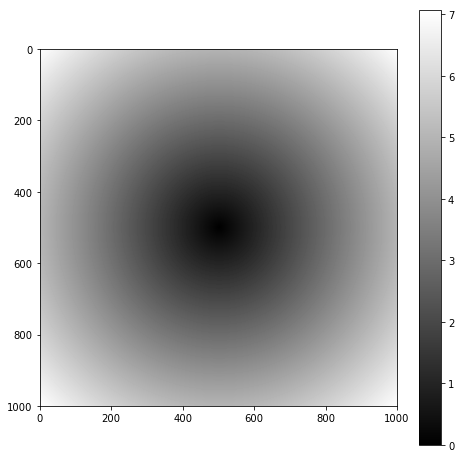

In [328]:
z = np.sqrt(xs**2 + ys**2)

figsize=(8,8)
fig = plt.figure(figsize=figsize)
plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()

### 條件索引 np.where(條件, arr1, arr2)，真就選arr1，否就選arr2

In [333]:
arr1 = np.arange(0,10)
arr2 = np.arange(10,20)
arr3 = np.where(0 , arr1, arr2) #永遠都錯，所以都選arr2
arr3

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [336]:
arr1 = np.arange(0,10)
arr2 = np.where(arr1>=5 , 1, -1)
arr2

array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1])

### 統計工具

In [341]:
arr = np.array([0,0,1,1,1,1,1,2,2,3,3,3,3,4,10])

In [343]:
arr.mean()

2.3333333333333335

In [344]:
arr.sum()

35

In [345]:
arr.std()

2.3570226039551585

In [367]:
arr2D = np.arange(9).reshape(3,3)
arr2D

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [368]:
arr2D.mean()

4.0

In [369]:
arr2D.mean(axis=0) #沿著column上下

array([ 3.,  4.,  5.])

In [370]:
arr2D.mean(axis=1) #沿著row左右

array([ 1.,  4.,  7.])

In [371]:
arr2D.argmin()

0

In [372]:
arr2D.argmax()

8

In [373]:
arr2D.cumsum() #累積和

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

In [375]:
arr2D[arr2D>0].cumprod() #累積積

array([    1,     2,     6,    24,   120,   720,  5040, 40320])

### bool數組 .any(), .all()

In [384]:
bools = np.array([0,1,1])
bools

array([0, 1, 1])

In [385]:
bools.any() #是否>=1個true

True

In [386]:
bools.all() #是否全部都是true

False

### np.sort排序

In [407]:
random.seed(42)
arr = randn(10)
arr

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [408]:
arr1 = np.sort(arr) #反傳的是copy的新數組
arr

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [410]:
arr1

array([-0.46947439, -0.23415337, -0.23413696, -0.1382643 ,  0.49671415,
        0.54256004,  0.64768854,  0.76743473,  1.52302986,  1.57921282])

In [409]:
arr.sort() #就地排序會影響數組本身
arr

array([-0.46947439, -0.23415337, -0.23413696, -0.1382643 ,  0.49671415,
        0.54256004,  0.64768854,  0.76743473,  1.52302986,  1.57921282])

### 唯一化並且排序np.unique同sort(set())

In [9]:
names = np.array(['d','c','a','b','c','a'])

In [10]:
np.unique(names)

array(['a', 'b', 'c', 'd'],
      dtype='<U1')

### 測試數組是否包含另一數組 np.in1d(被測試對象，對象)

In [12]:
names_2 = np.array(['a','b'])
np.in1d(names_2, names)

array([ True,  True], dtype=bool)

### 保存數組 np.save(name.npy, array)

### 讀取數組 np.load(name.npy)

### 多個數組存成壓縮檔 np.savez(name.npz , a= arr, b= arr)，載入用dict形式

### 讀取文本 np.loadtxt(name, delimite=',')

## 線性代數

### 矩陣相乘 np.dot(A, B)，如果不能相乘會轉乘 AxB.T

In [18]:
A = np.arange(1,5)
B = np.arange(2,6)

np.dot(A, B) #理論上要報告錯誤，

40

In [19]:
A.dot(B.T)

40

In [20]:
from numpy.linalg import inv , qr

In [23]:
random.seed(42)
X = randn(5, 5)
mat = X.T.dot(X)
inv(mat) #逆矩陣

array([[ 0.46603249,  0.83005941, -0.8914962 ,  0.34032244, -0.91383502],
       [ 0.83005941,  5.63797815, -5.98435482,  2.17215259, -5.85149016],
       [-0.8914962 , -5.98435482,  7.27912183, -2.36447819,  6.3663243 ],
       [ 0.34032244,  2.17215259, -2.36447819,  1.04007417, -2.43484522],
       [-0.91383502, -5.85149016,  6.3663243 , -2.43484522,  6.42635506]])

In [26]:
mat.dot(inv(mat)) #A*A-1 轉回對角矩陣

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  4.44089210e-16,   1.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,  -3.55271368e-15],
       [ -1.11022302e-16,  -4.44089210e-15,   1.00000000e+00,
         -6.66133815e-16,   3.55271368e-15],
       [ -8.88178420e-16,  -7.10542736e-15,   3.55271368e-15,
          1.00000000e+00,   7.10542736e-15],
       [ -8.88178420e-16,   0.00000000e+00,   0.00000000e+00,
         -1.77635684e-15,   1.00000000e+00]])

In [28]:
q, r = qr(mat)
r

array([[-3.03681936, -0.68357993,  0.18957716, -1.56834194, -1.86459486],
       [ 0.        , -5.13911996, -0.2298267 , -5.71568758, -6.71182716],
       [ 0.        ,  0.        , -1.4795309 ,  3.69369571,  2.94284836],
       [ 0.        ,  0.        ,  0.        , -7.56488899, -2.84866447],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09022874]])

In [29]:
q

array([[-0.98148564,  0.12744066, -0.11323416,  0.02870785, -0.08245418],
       [-0.00526572, -0.74003655, -0.34273964,  0.23683889, -0.52797259],
       [ 0.01574776, -0.13366892, -0.7682216 , -0.24850681,  0.57442543],
       [-0.05778081, -0.22201126,  0.17465578, -0.93198858, -0.21969302],
       [-0.18185595, -0.60741123,  0.49903758,  0.11280449,  0.57984193]])

### 生成隨機數 np.random

In [43]:
random.seed()
s1 = np.random.normal(size=(4,4)) #(0,1)標準常態分布
s1

array([[ 0.12221917, -0.51543566, -0.60025385,  0.94743982],
       [ 0.291034  , -0.63555974, -1.02155219, -0.16175539],
       [-0.5336488 , -0.00552786, -0.22945045,  0.38934891],
       [-1.26511911,  1.09199226,  2.77831304,  1.19363972]])

In [44]:
s2 = np.arange(5)
np.random.shuffle(s2) #就地隨機排列，會改變原本值
s2

array([0, 3, 1, 2, 4])

In [45]:
np.random.permutation(s2) #副本隨機排列，不會改變原本的值

array([0, 1, 4, 3, 2])

In [46]:
s2

array([0, 3, 1, 2, 4])

## 隨機漫步實驗

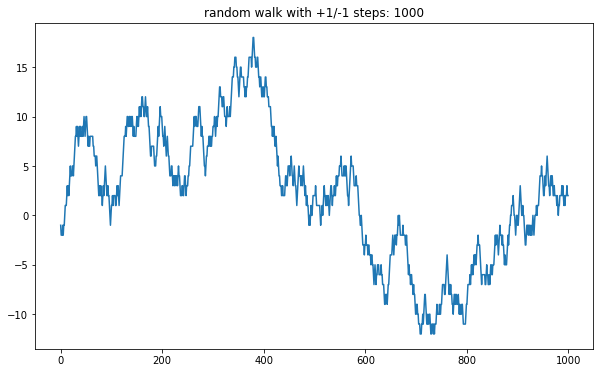

In [239]:
def random_walk(steps):    
    np.random.seed(50)
    r = np.random.randint(-1,1+1, size=steps)#這個有包含上下界
    path = r.cumsum()
    return path

steps = 1000
x_1000 = np.arange(steps)
record_1000 = random_walk(steps)

figsize=(10,6)
fig = plt.figure(figsize=figsize)
plt.plot(x_1000, record_1000)
plt.title('random walk with +1/-1 steps: 1000')

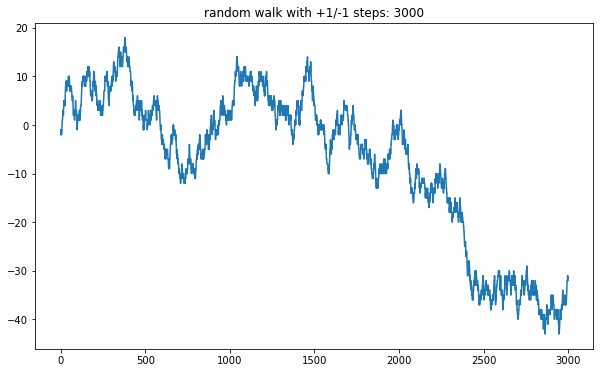

In [240]:
def random_walk(steps):    
    np.random.seed(50)
    r = np.random.randint(-1,1+1, size=steps)#這個有包含上下界
    path = r.cumsum()
    return path

steps = 3000
x_3000 = np.arange(steps)
record_3000 = random_walk(steps)

figsize=(10,6)
fig = plt.figure(figsize=figsize)
plt.plot(x_3000, record_3000)
plt.title('random walk with +1/-1 steps: 3000')

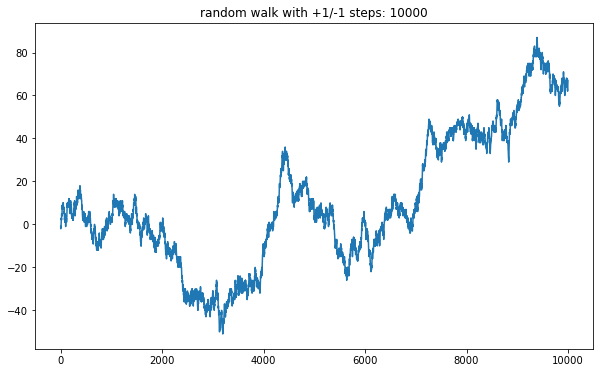

In [241]:
def random_walk(steps):    
    np.random.seed(50)
    r = np.random.randint(-1,1+1, size=steps)#這個有包含上下界
    path = r.cumsum()
    return path

steps = 10000
x_10000 = np.arange(steps)
record_10000 = random_walk(steps)

figsize=(10,6)
fig = plt.figure(figsize=figsize)
plt.plot(x_10000, record_10000)
plt.title('random walk with +1/-1 steps: 10000')

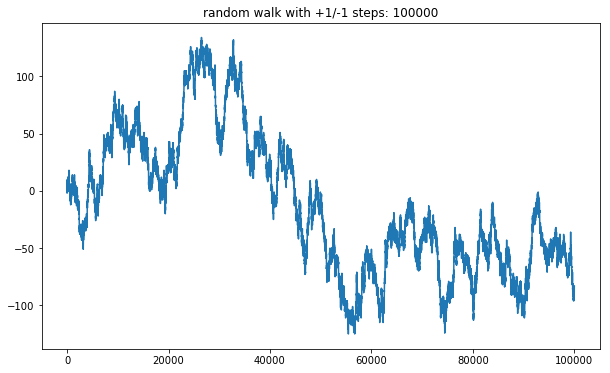

In [243]:
def random_walk(steps):    
    np.random.seed(50)
    r = np.random.randint(-1,1+1, size=steps)#這個有包含上下界
    path = r.cumsum()
    return path

steps = 100000
x_100000 = np.arange(steps)
record_100000 = random_walk(steps)

figsize=(10,6)
fig = plt.figure(figsize=figsize)
plt.plot(x_100000, record_100000)
plt.title('random walk with +1/-1 steps: 100000')

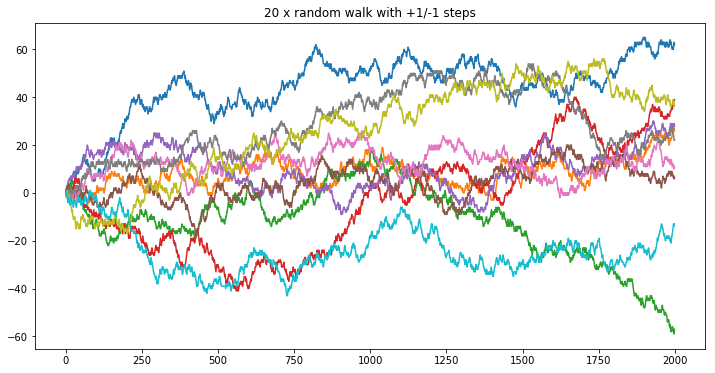

In [86]:
#一次走5組模型

import random

def random_walk(nwalks, nsteps):
    r = np.random.randint(-1,1+1, size = (nwalks, nsteps))
    paths = r.cumsum(1) #沿著axis=1 (橫向)
    return paths

nwalks = 10
nsteps = 2000

s = np.empty((nwalks, nsteps))
for i in range(nwalks):
    s[i] = np.arange(nsteps).astype(int)

record = random_walk(nwalks, nsteps)

fig = plt.figure(figsize=(12,6))
for i in range(nwalks):
    plt.plot(s[i], record[i])
plt.title('20 x random walk with +1/-1 steps')

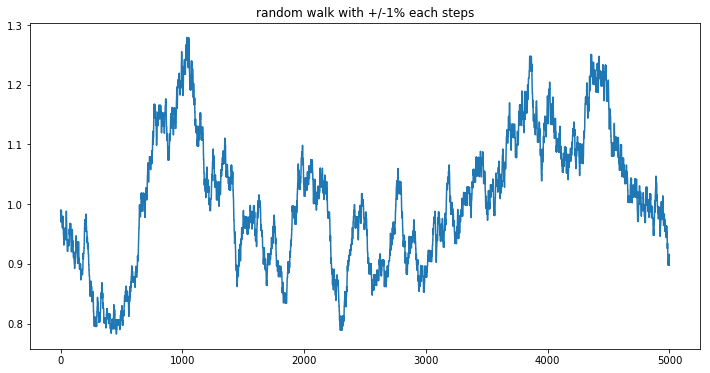

In [32]:
import random

def random_walk(steps):
    init = 1
    path = []
    
    for i in range(steps):
        r = np.random.randint(-1, 1+1) #這個有包含上下界
        init = init*(1+0.01*r)
        path.append(init)
        
    return path

steps = 5000
x = np.arange(steps)
record = random_walk(steps)

fig = plt.figure(figsize=(12,6))
plt.plot(x, record)
plt.title('random walk with +/-1% each steps')

# Pandas

In [87]:
import pandas as pd

## Series

In [95]:
obj = pd.Series([1,2,3])
a

0    1
1    2
2    3
dtype: int64

In [96]:
obj.values

array([1, 2, 3])

In [97]:
obj.index

RangeIndex(start=0, stop=3, step=1)

In [99]:
obj2 = pd.Series( [5,3,2,6,5], index=['d','a','b','c','e'])
obj2

d    5
a    3
b    2
c    6
e    5
dtype: int64

In [100]:
obj2.index

Index(['d', 'a', 'b', 'c', 'e'], dtype='object')

### 可以做和numpy相同的運算和索引

In [101]:
obj2['a']

3

In [103]:
obj2[obj2 >= 5]

d    5
c    6
e    5
dtype: int64

In [104]:
obj2 * 2

d    10
a     6
b     4
c    12
e    10
dtype: int64

In [105]:
np.exp(obj2)

d    148.413159
a     20.085537
b      7.389056
c    403.428793
e    148.413159
dtype: float64

### 可以直接用dict創建Series

In [123]:
data = {'c':2 ,'d':3, 'a':1, 'b':5, 'f':6}
obj3 = pd.Series(data)  #index用原本的key做排序
obj3

a    1
b    5
c    2
d    3
f    6
dtype: int64

In [124]:
data = {'c':2 ,'d':3, 'a':1, 'b':5}
data_index = ['c','d','a','b','e','h']
obj4 = pd.Series(data, index = data_index) 
obj4

c    2.0
d    3.0
a    1.0
b    5.0
e    NaN
h    NaN
dtype: float64

### 尋找缺失數值na：Series.isnull()

In [125]:
obj4.isnull() 

c    False
d    False
a    False
b    False
e     True
h     True
dtype: bool

In [126]:
obj4.notnull()

c     True
d     True
a     True
b     True
e    False
h    False
dtype: bool

In [127]:
pd.isnull(obj4)

c    False
d    False
a    False
b    False
e     True
h     True
dtype: bool

In [128]:
obj4.isnull().value_counts() #計算缺失值總數

False    4
True     2
dtype: int64

In [129]:
obj3 + obj4 #自動對齊

a     2.0
b    10.0
c     4.0
d     6.0
e     NaN
f     NaN
h     NaN
dtype: float64

In [139]:
obj4.name = 'name'

In [142]:
obj4.index.name = 'people_name'

In [143]:
obj4

people_name
c    2.0
d    3.0
a    1.0
b    5.0
e    NaN
h    NaN
Name: name, dtype: float64

## DataFrame

In [147]:
data = {'people':['b','a','d','c'],
        'age':[8,10,12,6],
        'smart?': [True, False, True, False]}

frame = pd.DataFrame(data) #會被加上index，並按照key的排序做columns的排列
frame

,age,people,smart?
0,8,b,True
1,10,a,False
2,12,d,True
3,6,c,False


In [165]:
frame2 = pd.DataFrame(data, columns=['age','smart?','idk'],
                      index = ['b','a','d','c']) #改成我們要的columns順序，找不到的變成NaN
frame2

,age,smart?,idk
b,8,True,NaN
a,10,False,NaN
d,12,True,NaN
c,6,False,NaN


In [166]:
frame2.columns

Index(['age', 'smart?', 'idk'], dtype='object')

In [167]:
frame2['age'] #用column索引整個直排

b     8
a    10
d    12
c     6
Name: age, dtype: int64

In [168]:
frame2.age

b     8
a    10
d    12
c     6
Name: age, dtype: int64

In [169]:
frame2.ix['a'] #用index索引整個橫排

age          10
smart?    False
idk         NaN
Name: a, dtype: object

In [172]:
frame2['id'] = np.arange(4) #新增欄位
frame2

,age,smart?,idk,Id,id
b,8,True,NaN,0,0
a,10,False,NaN,1,1
d,12,True,NaN,2,2
c,6,False,NaN,3,3


In [173]:
val = pd.Series([98,99], index=['b','d'])
frame2['score'] = val
frame2

,age,smart?,idk,Id,id,score
b,8,True,NaN,0,0,98.0
a,10,False,NaN,1,1,NaN
d,12,True,NaN,2,2,99.0
c,6,False,NaN,3,3,NaN


In [174]:
frame2.drop('Id', axis=1, inplace=True) #打錯字的一行要刪掉
frame2

,age,smart?,idk,id,score
b,8,True,NaN,0,98.0
a,10,False,NaN,1,NaN
d,12,True,NaN,2,99.0
c,6,False,NaN,3,NaN


In [177]:
frame2['id=1'] = frame2['id']==1
frame2

,age,smart?,idk,id,score,id=1
b,8,True,NaN,0,98.0,False
a,10,False,NaN,1,NaN,True
d,12,True,NaN,2,99.0,False
c,6,False,NaN,3,NaN,False


In [178]:
del frame2['id=1']  #刪除column
frame2

,age,smart?,idk,id,score
b,8,True,NaN,0,98.0
a,10,False,NaN,1,NaN
d,12,True,NaN,2,99.0
c,6,False,NaN,3,NaN


In [180]:
#取出部分data
pdata = {'age': frame2['age'][0:2],
         'id': frame2['id'][0:2]}

frame3 = pd.DataFrame(pdata)
frame3 

,age,id
b,8,0
a,10,1


In [181]:
frame2.values #返回二元數組

array([[8, True, nan, 0, 98.0],
       [10, False, nan, 1, nan],
       [12, True, nan, 2, 99.0],
       [6, False, nan, 3, nan]], dtype=object)

### 索引對象

In [182]:
obj = pd.Series(range(3), index=['a','b','c'])
obj

a    0
b    1
c    2
dtype: int64

In [183]:
obj.index #index是不可以被修改的，這樣數據結構才會完整

Index(['a', 'b', 'c'], dtype='object')

In [184]:
index = obj.index
obj2 = pd.Series(range(4,7) ,index = index)
obj2

a    4
b    5
c    6
dtype: int64

In [186]:
obj2 = obj2.reindex(index = ['a','b','c','d']) #重新索引
obj2

a    4.0
b    5.0
c    6.0
d    NaN
dtype: float64

In [188]:
obj2 = obj2.reindex(index = ['a','b','c','e'], fill_value = 0) #重新索引，並填入缺失值
obj2

a    4.0
b    5.0
c    6.0
e    0.0
dtype: float64

In [191]:
obj3 = pd.Series(['a','b','c'] , index=[0,2,4])
obj3 = obj3.reindex(range(6), method = 'ffill') #改變index，並且用forward fill
obj3

0    a
1    a
2    b
3    b
4    c
5    c
dtype: object

In [251]:
data = {'people':['b','a','d','c'],
        'age':[8,10,12,6],
        'smart?': [True, False, True, False]}

frame = pd.DataFrame(data) #會被加上index，並按照key的排序做columns的排列
frame

,age,people,smart?
0,8,b,True
1,10,a,False
2,12,d,True
3,6,c,False


In [194]:
frame.reindex(columns=['people','smart?','age'], index=range(4)) #columns重新排序也是一樣的

,people,smart?,age
0,b,True,8
1,a,False,10
2,d,True,12
3,c,False,6


In [197]:
new_frame = frame.drop(1)  #index
new_frame

,age,people,smart?
0,8,b,True
2,12,d,True
3,6,c,False


In [199]:
new_frame = frame.drop(frame['smart?']) 
new_frame

,age,people,smart?
2,12,d,True
3,6,c,False


In [203]:
frame.age > 10

0    False
1    False
2     True
3    False
Name: age, dtype: bool

In [202]:
frame[frame.age>10]

,age,people,smart?
2,12,d,True


In [206]:
frame.ix[0,['age', 'people']] # ix法索引，左邊是index，右邊擺columns名稱

age       8
people    b
Name: 0, dtype: object

In [255]:
frame[0:2]

,age,people,smart?
0,8,b,True
1,10,a,False


In [257]:
frame['age'] #按照column上下

0     8
1    10
2    12
3     6
Name: age, dtype: int64

In [259]:
frame.ix[0] #按照row橫向

age          8
people       b
smart?    True
Name: 0, dtype: object

### df四則運算

In [264]:
df1 = pd.DataFrame(np.arange(12).reshape(3,4) , columns=list('abcd'), index=list('ABC'))
df2 = pd.DataFrame(np.arange(20).reshape(5,4) , columns=list('abce'), index=list('BCDEF'))

In [265]:
df1

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [266]:
df2

,a,b,c,e
B,0,1,2,3
C,4,5,6,7
D,8,9,10,11
E,12,13,14,15
F,16,17,18,19


In [267]:
df1+df2 #缺漏項目自動補上NaN

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,4.0,6.0,8.0,NaN,NaN
C,12.0,14.0,16.0,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN


In [268]:
df1.add(df2, fill_value=0) #闕漏項目填補0

,a,b,c,d,e
A,0.0,1.0,2.0,3.0,NaN
B,4.0,6.0,8.0,7.0,3.0
C,12.0,14.0,16.0,11.0,7.0
D,8.0,9.0,10.0,NaN,11.0
E,12.0,13.0,14.0,NaN,15.0
F,16.0,17.0,18.0,NaN,19.0


In [269]:
df2.add(df1, fill_value=0)

,a,b,c,d,e
A,0.0,1.0,2.0,3.0,NaN
B,4.0,6.0,8.0,7.0,3.0
C,12.0,14.0,16.0,11.0,7.0
D,8.0,9.0,10.0,NaN,11.0
E,12.0,13.0,14.0,NaN,15.0
F,16.0,17.0,18.0,NaN,19.0


In [274]:
df1-df2

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,4.0,4.0,4.0,NaN,NaN
C,4.0,4.0,4.0,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN


In [272]:
df1*df2

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,0.0,5.0,12.0,NaN,NaN
C,32.0,45.0,60.0,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN


In [273]:
df1/df2

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,inf,5.0,3.000000,NaN,NaN
C,2.000000,1.8,1.666667,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN


In [275]:
df2 - df1.ix[0] #跟np.array會有broadcasting的效果

,a,b,c,d,e
B,0.0,0.0,0.0,NaN,NaN
C,4.0,4.0,4.0,NaN,NaN
D,8.0,8.0,8.0,NaN,NaN
E,12.0,12.0,12.0,NaN,NaN
F,16.0,16.0,16.0,NaN,NaN


In [276]:
df2 + df1.ix[0]

,a,b,c,d,e
B,0.0,2.0,4.0,NaN,NaN
C,4.0,6.0,8.0,NaN,NaN
D,8.0,10.0,12.0,NaN,NaN
E,12.0,14.0,16.0,NaN,NaN
F,16.0,18.0,20.0,NaN,NaN


### pandas ufunc函數應用同numpy，也可以自定義函數使用.apply() , .applymap()

In [302]:
np.random.seed(50)
df1 = pd.DataFrame(np.random.randint(-1,1+1 , (3,4)) , columns=list('abcd'), index=list('ABC'))
df2 = pd.DataFrame(np.random.randint(-2,2+1, (5,4)) , columns=list('abce'), index=list('BCDEF'))

In [303]:
df1

,a,b,c,d
A,-1,-1,0,0
B,1,-1,1,0
C,1,1,0,0


In [283]:
df2

,a,b,c,e
B,0,0,2,1
C,2,1,0,0
D,2,1,-1,0
E,-1,-2,1,1
F,0,-1,1,1


In [286]:
np.abs(df1)

,a,b,c,d
A,1,1,0,0
B,1,1,1,0
C,1,1,0,0


In [287]:
np.max(df1)

a    1
b    1
c    1
d    0
dtype: int64

In [288]:
f = lambda x: x.max()-x.min()
df1.apply(f)  #套用簡單的函數

a    2
b    2
c    1
d    0
dtype: int64

In [304]:
f1 = lambda x: x.max()
f2 = lambda x: x.min()
f3 = lambda x: x.mean()

df1['max'] = df1.apply(f1, axis=1) #apply用在單一軸向
df1['min'] = df1.apply(f2, axis=1)
df1['mean'] = df1.apply(f3, axis=1)
df1

,a,b,c,d,max,min,mean
A,-1,-1,0,0,0,-1,-0.500000
B,1,-1,1,0,1,-1,0.166667
C,1,1,0,0,1,0,0.500000


In [305]:
format_2f = lambda x: '%.2f' % x
df1.applymap(format_2f) #applymap可以整個dataframe一起

,a,b,c,d,max,min,mean
A,-1.00,-1.00,0.00,0.00,0.00,-1.00,-0.50
B,1.00,-1.00,1.00,0.00,1.00,-1.00,0.17
C,1.00,1.00,0.00,0.00,1.00,0.00,0.50


### 排序 .sort_index() , .rank()

In [309]:
np.random.seed(50)
df1 = pd.DataFrame(np.random.randint(-9,9+1 , (5,5)) , columns=list('dcabe'), index=list('DBAKJ'))
df1

,d,c,a,b,e
D,7,-9,2,4,-8
B,-5,-3,-4,-3,4
A,-4,-7,-2,6,-5
K,5,-6,-3,2,8
J,1,0,-9,-3,-7


In [310]:
df1.sort_index() #排序index

,d,c,a,b,e
A,-4,-7,-2,6,-5
B,-5,-3,-4,-3,4
D,7,-9,2,4,-8
J,1,0,-9,-3,-7
K,5,-6,-3,2,8


In [311]:
df1.sort_index(axis = 1) #排序columns

,a,b,c,d,e
D,2,4,-9,7,-8
B,-4,-3,-3,-5,4
A,-2,6,-7,-4,-5
K,-3,2,-6,5,8
J,-9,-3,0,1,-7


In [314]:
df1['a'].sort_values() #對Series排序

J   -9
B   -4
K   -3
A   -2
D    2
Name: a, dtype: int64

In [315]:
df1.sort_values(by='a') #由某一個columns的值做排序

,d,c,a,b,e
J,1,0,-9,-3,-7
B,-5,-3,-4,-3,4
K,5,-6,-3,2,8
A,-4,-7,-2,6,-5
D,7,-9,2,4,-8


In [316]:
df1.sort_values(by=['a','b']) #由指定columns的值做排序

,d,c,a,b,e
J,1,0,-9,-3,-7
B,-5,-3,-4,-3,4
K,5,-6,-3,2,8
A,-4,-7,-2,6,-5
D,7,-9,2,4,-8


In [317]:
df1.rank() #為各組分配一個平均排名，按照大小順序做出排名

,d,c,a,b,e
D,5.0,1.0,5.0,4.0,1.0
B,1.0,4.0,2.0,1.5,4.0
A,2.0,2.0,4.0,5.0,3.0
K,4.0,3.0,3.0,3.0,5.0
J,3.0,5.0,1.0,1.5,2.0


In [318]:
df1.rank(method='first') #按照順序做出排名

,d,c,a,b,e
D,5.0,1.0,5.0,4.0,1.0
B,1.0,4.0,2.0,1.0,4.0
A,2.0,2.0,4.0,5.0,3.0
K,4.0,3.0,3.0,3.0,5.0
J,3.0,5.0,1.0,2.0,2.0


In [319]:
df1.rank(method='max') #按照順序做出排名

,d,c,a,b,e
D,5.0,1.0,5.0,4.0,1.0
B,1.0,4.0,2.0,2.0,4.0
A,2.0,2.0,4.0,5.0,3.0
K,4.0,3.0,3.0,3.0,5.0
J,3.0,5.0,1.0,2.0,2.0


### 小統計

In [322]:
np.random.seed(50)
df1 = pd.DataFrame(np.random.randint(-9,9+1 , (5,5)) , columns=list('dcabe'), index=list('ABCDE'))
df2 = pd.DataFrame(np.arange(25).reshape(5,5) , columns=list('dcabe'), index=list('BCDEF'))
df3 = df1+df2
df3

,d,c,a,b,e
A,NaN,NaN,NaN,NaN,NaN
B,-5.0,-2.0,-2.0,0.0,8.0
C,1.0,-1.0,5.0,14.0,4.0
D,15.0,5.0,9.0,15.0,22.0
E,16.0,16.0,8.0,15.0,12.0
F,NaN,NaN,NaN,NaN,NaN


In [323]:
df3.sum()

d    27.0
c    18.0
a    20.0
b    44.0
e    46.0
dtype: float64

In [324]:
df3.sum(axis=1)

A     0.0
B    -1.0
C    23.0
D    66.0
E    67.0
F     0.0
dtype: float64

In [325]:
df3.sum(axis=1, skipna=False) #不准他略過NA

A     NaN
B    -1.0
C    23.0
D    66.0
E    67.0
F     NaN
dtype: float64

In [326]:
df3.idxmax() #返回達到最大值的索引

d    E
c    E
a    D
b    D
e    D
dtype: object

In [327]:
df3.cumsum()

,d,c,a,b,e
A,NaN,NaN,NaN,NaN,NaN
B,-5.0,-2.0,-2.0,0.0,8.0
C,-4.0,-3.0,3.0,14.0,12.0
D,11.0,2.0,12.0,29.0,34.0
E,27.0,18.0,20.0,44.0,46.0
F,NaN,NaN,NaN,NaN,NaN


In [329]:
df3.describe() #整理

,d,c,a,b,e
count,4.000000,4.000000,4.000000,4.000000,4.00000
mean,6.750000,4.500000,5.000000,11.000000,11.50000
std,10.404326,8.266398,4.966555,7.348469,7.72442
min,-5.000000,-2.000000,-2.000000,0.000000,4.00000
25%,-0.500000,-1.250000,3.250000,10.500000,7.00000
50%,8.000000,2.000000,6.500000,14.500000,10.00000
75%,15.250000,7.750000,8.250000,15.000000,14.50000
max,16.000000,16.000000,9.000000,15.000000,22.00000


In [332]:
df3.count() #回傳非NA的量

d    4
c    4
a    4
b    4
e    4
dtype: int64

In [337]:
df3.skew()

d   -0.271916
c    1.274628
a   -1.371335
b   -1.975720
e    1.002408
dtype: float64

In [339]:
df3.kurt()

d   -4.366571
c    0.913028
a    1.500000
b    3.914266
e    0.983864
dtype: float64

In [340]:
df3.d.argmax() #Series中能獲取最大值的索引

'E'

In [342]:
df3.d.argmin()

'B'

In [343]:
df3.d.diff() #一階分差

A     NaN
B     NaN
C     6.0
D    14.0
E     1.0
F     NaN
Name: d, dtype: float64

In [344]:
df3.d.pct_change() #跟前一筆數據的百分位數差別

A          NaN
B          NaN
C    -1.200000
D    14.000000
E     0.066667
F          NaN
Name: d, dtype: float64

### 計算correlation

In [346]:
np.random.seed(50)
df1 = pd.DataFrame(np.random.randint(-9,9+1 , (5,5)) , columns=list('abcde'), index=list('ABCDE'))
df1

,a,b,c,d,e
A,7,-9,2,4,-8
B,-5,-3,-4,-3,4
C,-4,-7,-2,6,-5
D,5,-6,-3,2,8
E,1,0,-9,-3,-7


In [347]:
df1.corr() #correlation

,a,b,c,d,e
a,1.000000,-0.399468,0.365945,0.244227,-0.109110
b,-0.399468,1.000000,-0.963671,-0.882464,0.069107
c,0.365945,-0.963671,1.000000,0.744182,-0.075758
d,0.244227,-0.882464,0.744182,1.000000,-0.234031
e,-0.109110,0.069107,-0.075758,-0.234031,1.000000


In [352]:
df1.corrwith(df1.a) #抽取出其中一個column跟其他人的相關係數

a    1.000000
b   -0.399468
c    0.365945
d    0.244227
e   -0.109110
dtype: float64

### 計算Series各數值的個數 value_counts()，適合用於binary/multiple classification統計

In [3]:
np.random.seed(50)
df1 = pd.DataFrame(np.random.randint(-1,1+1 , (5,5)) , columns=list('abcde'), index=list('AACDE'))
df1

,a,b,c,d,e
A,-1,-1,0,0,1
A,-1,1,0,1,1
C,0,0,1,1,-1
D,1,-1,1,1,1
E,-1,0,0,1,0


In [4]:
df1.values

array([[-1, -1,  0,  0,  1],
       [-1,  1,  0,  1,  1],
       [ 0,  0,  1,  1, -1],
       [ 1, -1,  1,  1,  1],
       [-1,  0,  0,  1,  0]])

In [5]:
df1.a.value_counts() #一維度的Series才可以做value_counts，返回的也是Series

-1    3
 1    1
 0    1
Name: a, dtype: int64

In [6]:
df1.index.unique()

Index(['A', 'C', 'D', 'E'], dtype='object')

In [8]:
data_count = df1.apply(pd.value_counts, axis=0).fillna(0)  #整張大表沿著axis=0做value_counts的結果
data_count

,a,b,c,d,e
-1,3,2,0.0,0.0,1
0,1,2,3.0,1.0,1
1,1,1,2.0,4.0,3


### 尋找、過濾缺失數值(NaN)  Series.isnull().value_counts(),  dropna(axis=?)

In [39]:
data = pd.Series([0,1,np.nan,3,4,np.nan], index=list('abcdef'))
data

a    0.0
b    1.0
c    NaN
d    3.0
e    4.0
f    NaN
dtype: float64

In [23]:
data.isnull() #哪個是缺失值

a    False
b    False
c     True
d    False
e    False
f     True
dtype: bool

In [45]:
data[data.isnull()].index #回傳缺失值的index

Index(['c', 'f'], dtype='object')

In [13]:
data.isnull().value_counts() #檢查缺失值個數

False    3
True     1
dtype: int64

In [40]:
data2 = data.fillna(-1) #要加上inplace=True才會更改原版
data2

a    0.0
b    1.0
c   -1.0
d    3.0
e    4.0
f   -1.0
dtype: float64

In [42]:
data.dropna() #要加上inplace=True才會更改原版

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [43]:
data[data.notnull()]

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [44]:
data[data.isnull()]

c   NaN
f   NaN
dtype: float64

In [60]:
df = pd.DataFrame([[0,1,2,3,4,5],
                   [0,1,2,np.nan,4,np.nan],
                   [0,1,np.nan,3,4,np.nan],
                   [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]], 
                  
                  index=list('ABCD'), columns =list('abcdef'))
df

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0
B,0.0,1.0,2.0,NaN,4.0,NaN
C,0.0,1.0,NaN,3.0,4.0,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.dropna(axis=0, how='all')

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0
B,0.0,1.0,2.0,NaN,4.0,NaN
C,0.0,1.0,NaN,3.0,4.0,NaN


In [62]:
df.dropna(axis=0, how='any') #預設是nan，只要有nan就丟掉

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0


In [63]:
df.dropna(axis=1, how='all')

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0
B,0.0,1.0,2.0,NaN,4.0,NaN
C,0.0,1.0,NaN,3.0,4.0,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.dropna(axis=1, how='any')

""
A
B
C
D


### 填補缺失值 fillna(value), fillna(method='ffill')

In [65]:
df = pd.DataFrame([[0,1,2,3,4,5],
                   [0,1,2,np.nan,4,np.nan],
                   [0,1,np.nan,3,4,np.nan],
                   [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]], 
                  
                  index=list('ABCD'), columns =list('abcdef'))
df

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0
B,0.0,1.0,2.0,NaN,4.0,NaN
C,0.0,1.0,NaN,3.0,4.0,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df.fillna(-1)

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0
B,0.0,1.0,2.0,-1.0,4.0,-1.0
C,0.0,1.0,-1.0,3.0,4.0,-1.0
D,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [73]:
df.fillna(method='ffill')

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0
B,0.0,1.0,2.0,3.0,4.0,5.0
C,0.0,1.0,2.0,3.0,4.0,5.0
D,0.0,1.0,2.0,3.0,4.0,5.0


In [74]:
df.fillna(method='bfill')

,a,b,c,d,e,f
A,0.0,1.0,2.0,3.0,4.0,5.0
B,0.0,1.0,2.0,3.0,4.0,NaN
C,0.0,1.0,NaN,3.0,4.0,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN


## Hierarchical indexing，把高維度的數據轉乘低維度的

In [80]:
data = pd.Series(np.random.randn(9), 
                 index=[list('aaabbbccc'),list('123123123')])
data

a  1   -1.752106
   2    0.157961
   3    0.013534
b  1    0.365593
   2   -0.253501
   3    1.081694
c  1   -2.077021
   2    0.401702
   3    2.076398
dtype: float64

In [81]:
data.index

MultiIndex(levels=[['a', 'b', 'c'], ['1', '2', '3']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [84]:
data.ix[['b','c']]

b  1    0.365593
   2   -0.253501
   3    1.081694
c  1   -2.077021
   2    0.401702
   3    2.076398
dtype: float64

In [82]:
data['b']

1    0.365593
2   -0.253501
3    1.081694
dtype: float64

In [86]:
data['b'][:2]

1    0.365593
2   -0.253501
dtype: float64

In [88]:
data.unstack() #一維度數據排列成二維度！！

,1,2,3
a,-1.752106,0.157961,0.013534
b,0.365593,-0.253501,1.081694
c,-2.077021,0.401702,2.076398


In [89]:
data.unstack().stack() #逆運算

a  1   -1.752106
   2    0.157961
   3    0.013534
b  1    0.365593
   2   -0.253501
   3    1.081694
c  1   -2.077021
   2    0.401702
   3    2.076398
dtype: float64

In [96]:
frame = pd.DataFrame(np.random.randn(18).reshape(9,2), 
                    index = [list('aaabbbccc'),list('123123123')],
                    columns = [ ['R','R'], ['R1','R2'] ])
frame

R          
           R1        R2
a 1 -1.220343 -0.818289
  2  0.357207  1.279346
  3 -0.698994 -0.928306
b 1  0.524142  0.698731
  2 -1.998958  0.425794
  3  1.438229 -0.145374
c 1 -1.619435 -0.206920
  2  0.478241  0.018690
  3 -0.702650 -1.213787

In [97]:
frame.index

MultiIndex(levels=[['a', 'b', 'c'], ['1', '2', '3']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [98]:
frame.columns

MultiIndex(levels=[['R'], ['R1', 'R2']],
           labels=[[0, 0], [0, 1]])

In [100]:
frame.index.names = ['key1','key2']
frame

R          
                 R1        R2
key1 key2                    
a    1    -1.220343 -0.818289
     2     0.357207  1.279346
     3    -0.698994 -0.928306
b    1     0.524142  0.698731
     2    -1.998958  0.425794
     3     1.438229 -0.145374
c    1    -1.619435 -0.206920
     2     0.478241  0.018690
     3    -0.702650 -1.213787

In [102]:
frame.columns.names = ['Key1','Key2']
frame

Key1              R          
Key2             R1        R2
key1 key2                    
a    1    -1.220343 -0.818289
     2     0.357207  1.279346
     3    -0.698994 -0.928306
b    1     0.524142  0.698731
     2    -1.998958  0.425794
     3     1.438229 -0.145374
c    1    -1.619435 -0.206920
     2     0.478241  0.018690
     3    -0.702650 -1.213787

In [104]:
frame['R']['R1']

key1  key2
a     1      -1.220343
      2       0.357207
      3      -0.698994
b     1       0.524142
      2      -1.998958
      3       1.438229
c     1      -1.619435
      2       0.478241
      3      -0.702650
Name: R1, dtype: float64

In [105]:
frame.swaplevel('key1','key2') #兌換層級

Key1              R          
Key2             R1        R2
key2 key1                    
1    a    -1.220343 -0.818289
2    a     0.357207  1.279346
3    a    -0.698994 -0.928306
1    b     0.524142  0.698731
2    b    -1.998958  0.425794
3    b     1.438229 -0.145374
1    c    -1.619435 -0.206920
2    c     0.478241  0.018690
3    c    -0.702650 -1.213787

In [107]:
frame.sortlevel(1) #用第一層排列

Key1              R          
Key2             R1        R2
key1 key2                    
a    1    -1.220343 -0.818289
b    1     0.524142  0.698731
c    1    -1.619435 -0.206920
a    2     0.357207  1.279346
b    2    -1.998958  0.425794
c    2     0.478241  0.018690
a    3    -0.698994 -0.928306
b    3     1.438229 -0.145374
c    3    -0.702650 -1.213787

In [109]:
frame.sortlevel(0) #用第0層排列

Key1              R          
Key2             R1        R2
key1 key2                    
a    1    -1.220343 -0.818289
     2     0.357207  1.279346
     3    -0.698994 -0.928306
b    1     0.524142  0.698731
     2    -1.998958  0.425794
     3     1.438229 -0.145374
c    1    -1.619435 -0.206920
     2     0.478241  0.018690
     3    -0.702650 -1.213787

In [110]:
frame['R'].sum()

Key2
R1   -3.442561
R2   -0.890115
dtype: float64

In [111]:
frame['R'].describe()

Key2,R1,R2
count,9.000000,9.000000
mean,-0.382507,-0.098902
std,1.144153,0.812953
min,-1.998958,-1.213787
25%,-1.220343,-0.818289
50%,-0.698994,-0.145374
75%,0.478241,0.425794
max,1.438229,1.279346


In [118]:
frame.sum(level='key2')

Key1         R          
Key2        R1        R2
key2                    
1    -2.315636 -0.326478
2    -1.163510  1.723830
3     0.036585 -2.287467

In [119]:
frame.sum(level='key1')

Key1         R          
Key2        R1        R2
key1                    
a    -1.562130 -0.467250
b    -0.036587  0.979151
c    -1.843843 -1.402016

In [117]:
#用其中的一個Series作為index
frame2 = frame['R'].set_index('R1')
frame2

Key2,R2
R1,
-1.220343,-0.818289
0.357207,1.279346
-0.698994,-0.928306
0.524142,0.698731
-1.998958,0.425794
1.438229,-0.145374
-1.619435,-0.206920
0.478241,0.018690
-0.702650,-1.213787


### 補充：絕對索引法 .iloc[]

In [133]:
#絕對index索引法，不管標籤是什麼，都用位置排列
data = pd.Series([0,1,np.nan,3,4,np.nan], index=list('abcdef'))
data.iloc[0:3] 

a    0.0
b    1.0
c    NaN
dtype: float64

In [134]:
np.random.seed(50)
frame = pd.DataFrame(np.random.randint(-9,9+1 , (5,5)) , columns=list('abcde'), index=list('ABCDE'))
frame

,a,b,c,d,e
A,7,-9,2,4,-8
B,-5,-3,-4,-3,4
C,-4,-7,-2,6,-5
D,5,-6,-3,2,8
E,1,0,-9,-3,-7


In [137]:
frame.iloc[0:2]

,a,b,c,d,e
A,7,-9,2,4,-8
B,-5,-3,-4,-3,4


# 數據加載、存儲、文件格式

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 讀取csv檔案: pd.read_csv(path+filename)，直接逗號分隔

index_col設定index，沒有設定他會自己預設

In [149]:
path = '/Users/mac/Desktop/Kaggle_datasets/Titanic/train.csv'
df2 = pd.read_csv(path , index_col='PassengerId')  #index_col設定index，沒有設定他會自己預設
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


逐步讀取

In [165]:
path = '/Users/mac/Desktop/Kaggle_datasets/Titanic/train.csv'
chunker = pd.read_csv(path , index_col='PassengerId', nrows=10)  #index_col設定index，沒有設定他會自己預設
chunker

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### pd.read_table('', sep=)，需要指定分隔號（可以使用regular expression）

In [141]:
path = '/Users/mac/Desktop/Kaggle_datasets/Titanic/train.csv'
df2 = pd.read_table(path, sep=',') #可以使用正則表達式
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 直接從剪貼簿複製表格 pd.read_clipboard()

In [146]:
df = pd.read_clipboard(index_col = 'Date') #太神啦，直接從其他地方複製表格！！
df.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Sep 19, 2017","22,349.70","22,386.01","22,340.71","22,370.80","22,370.80","295,570,000"
"Sep 18, 2017","22,297.92","22,355.62","22,283.35","22,331.35","22,331.35","302,740,000"
"Sep 15, 2017","22,252.44","22,275.02","22,214.52","22,268.34","22,268.34","527,540,000"
"Sep 14, 2017","22,144.96","22,216.44","22,135.26","22,203.48","22,203.48","297,780,000"
"Sep 13, 2017","22,103.47","22,158.18","22,095.79","22,158.18","22,158.18","291,890,000"


In [167]:
df.to_csv('/Users/mac/Desktop/DJI.csv')
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Sep 19, 2017","22,349.70","22,386.01","22,340.71","22,370.80","22,370.80","295,570,000"
"Sep 18, 2017","22,297.92","22,355.62","22,283.35","22,331.35","22,331.35","302,740,000"
"Sep 15, 2017","22,252.44","22,275.02","22,214.52","22,268.34","22,268.34","527,540,000"
"Sep 14, 2017","22,144.96","22,216.44","22,135.26","22,203.48","22,203.48","297,780,000"
"Sep 13, 2017","22,103.47","22,158.18","22,095.79","22,158.18","22,158.18","291,890,000"
"Sep 12, 2017","22,090.56","22,134.57","22,087.09","22,118.86","22,118.86","364,580,000"
"Sep 11, 2017","21,927.79","22,067.10","21,927.79","22,057.37","22,057.37","312,770,000"
"Sep 08, 2017","21,764.43","21,846.63","21,731.12","21,797.79","21,797.79","289,400,000"
"Sep 07, 2017","21,820.38","21,850.01","21,745.71","21,784.78","21,784.78","333,810,000"


### 使用python內建的csv.reader

In [170]:
import csv

f = open('/Users/mac/Desktop/DJI.csv')
reader = csv.reader(f)

for line in reader:
    print(line)

['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
['Sep 19, 2017', '22,349.70', '22,386.01', '22,340.71', '22,370.80', '22,370.80', '295,570,000']
['Sep 18, 2017', '22,297.92', '22,355.62', '22,283.35', '22,331.35', '22,331.35', '302,740,000']
['Sep 15, 2017', '22,252.44', '22,275.02', '22,214.52', '22,268.34', '22,268.34', '527,540,000']
['Sep 14, 2017', '22,144.96', '22,216.44', '22,135.26', '22,203.48', '22,203.48', '297,780,000']
['Sep 13, 2017', '22,103.47', '22,158.18', '22,095.79', '22,158.18', '22,158.18', '291,890,000']
['Sep 12, 2017', '22,090.56', '22,134.57', '22,087.09', '22,118.86', '22,118.86', '364,580,000']
['Sep 11, 2017', '21,927.79', '22,067.10', '21,927.79', '22,057.37', '22,057.37', '312,770,000']
['Sep 08, 2017', '21,764.43', '21,846.63', '21,731.12', '21,797.79', '21,797.79', '289,400,000']
['Sep 07, 2017', '21,820.38', '21,850.01', '21,745.71', '21,784.78', '21,784.78', '333,810,000']
['Sep 06, 2017', '21,815.76', '21,849.24', '21,794.07', '21,

In [172]:
f = open('/Users/mac/Desktop/DJI.csv')
lines = list(csv.reader(f))

header , values = lines[0], lines[1:5] 

data_dict = {k:v  for k,v in zip(header, zip(*values)) }
data_dict

{'Adj Close**': ('22,370.80', '22,331.35', '22,268.34', '22,203.48'),
 'Close*': ('22,370.80', '22,331.35', '22,268.34', '22,203.48'),
 'Date': ('Sep 19, 2017', 'Sep 18, 2017', 'Sep 15, 2017', 'Sep 14, 2017'),
 'High': ('22,386.01', '22,355.62', '22,275.02', '22,216.44'),
 'Low': ('22,340.71', '22,283.35', '22,214.52', '22,135.26'),
 'Open': ('22,349.70', '22,297.92', '22,252.44', '22,144.96'),
 'Volume': ('295,570,000', '302,740,000', '527,540,000', '297,780,000')}

切換到windows系統，先生一個csv檔案出來

In [2]:
df = pd.read_clipboard(index_col = 'Date') #太神啦，直接從其他地方複製表格！！
df.to_csv('^GSPC.csv')
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Sep 19, 2017","2,506.29","2,507.84","2,503.19","2,506.65","2,506.65","3,249,100,000"
"Sep 18, 2017","2,502.51","2,508.32","2,499.92","2,503.87","2,503.87","3,194,300,000"
"Sep 15, 2017","2,495.67","2,500.23","2,493.16","2,500.23","2,500.23","4,853,170,000"
"Sep 14, 2017","2,494.56","2,498.43","2,491.35","2,495.62","2,495.62","3,414,460,000"
"Sep 13, 2017","2,493.89","2,498.37","2,492.14","2,498.37","2,498.37","3,368,050,000"
"Sep 12, 2017","2,491.94","2,496.77","2,490.37","2,496.48","2,496.48","3,230,920,000"
"Sep 11, 2017","2,474.52","2,488.95","2,474.52","2,488.11","2,488.11",-
"Sep 08, 2017","2,462.25","2,467.11","2,459.40","2,461.43","2,461.43","3,302,490,000"
"Sep 07, 2017","2,468.06","2,468.62","2,460.29","2,465.10","2,465.10","3,353,930,000"


### 儲存成二進位文件pickle: df.to_pickle() , df = pd.read_pickle()

In [5]:
df.to_pickle('^GSPC.pickle') #儲存成二進位數據

In [6]:
df = pd.read_pickle('^GSPC.pickle')
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Sep 19, 2017","2,506.29","2,507.84","2,503.19","2,506.65","2,506.65","3,249,100,000"
"Sep 18, 2017","2,502.51","2,508.32","2,499.92","2,503.87","2,503.87","3,194,300,000"
"Sep 15, 2017","2,495.67","2,500.23","2,493.16","2,500.23","2,500.23","4,853,170,000"
"Sep 14, 2017","2,494.56","2,498.43","2,491.35","2,495.62","2,495.62","3,414,460,000"
"Sep 13, 2017","2,493.89","2,498.37","2,492.14","2,498.37","2,498.37","3,368,050,000"
"Sep 12, 2017","2,491.94","2,496.77","2,490.37","2,496.48","2,496.48","3,230,920,000"
"Sep 11, 2017","2,474.52","2,488.95","2,474.52","2,488.11","2,488.11",-
"Sep 08, 2017","2,462.25","2,467.11","2,459.40","2,461.43","2,461.43","3,302,490,000"
"Sep 07, 2017","2,468.06","2,468.62","2,460.29","2,465.10","2,465.10","3,353,930,000"


### 讀取HDF5檔案(ex. keras DL weights): pd.HDFStore('.h5')，適合一次寫多次讀

### 讀取Excel檔案: pd.ExcelFile('.xls'), table = file.parse('Sheet1')

# 數據整理:清理、轉換、合併、重塑

In [8]:
df1 = pd.DataFrame({'key':list('abcdefg'), 'data1':np.arange(7)})
df2 = pd.DataFrame({'key':list('acejk'), 'data2':np.arange(5)})

In [9]:
df1

,data1,key
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e
5,5,f
6,6,g


In [10]:
df2

,data2,key
0,0,a
1,1,c
2,2,e
3,3,j
4,4,k


### 多對一合併: pd.merge(df1, df2, on='key', how='inner') ; df1.join(df2, how='left')

In [12]:
pd.merge(df1, df2, on='key') #default是將重疊的column當作key

,data1,key,data2
0,0,a,0
1,2,c,1
2,4,e,2


In [18]:
pd.merge(df1, df2, how='outer') #聯集

,data1,key,data2
0,0.0,a,0.0
1,1.0,b,NaN
2,2.0,c,1.0
3,3.0,d,NaN
4,4.0,e,2.0
5,5.0,f,NaN
6,6.0,g,NaN
7,NaN,j,3.0
8,NaN,k,4.0


In [19]:
pd.merge(df1, df2, how='inner') #交集

,data1,key,data2
0,0,a,0
1,2,c,1
2,4,e,2


In [20]:
pd.merge(df1, df2, on='key', how='left') #多對多，往左對齊

,data1,key,data2
0,0,a,0.0
1,1,b,NaN
2,2,c,1.0
3,3,d,NaN
4,4,e,2.0
5,5,f,NaN
6,6,g,NaN


In [21]:
pd.merge(df1, df2, on='key', how='right') #多對多，往右對齊

,data1,key,data2
0,0.0,a,0
1,2.0,c,1
2,4.0,e,2
3,NaN,j,3
4,NaN,k,4


In [17]:
df3 = pd.DataFrame({'key1':list('abcdefg'), 'data1':np.arange(7)})
df4 = pd.DataFrame({'key2':list('acejk'), 'data2':np.arange(5)})

pd.merge(df3,df4,left_on='key1',right_on='key2') #沒有重疊的column要指定

,data1,key1,data2,key2
0,0,a,0,a
1,2,c,1,c
2,4,e,2,e


In [24]:
df3.join(df4, how='left') #預測是how='left'

,data1,key1,data2,key2
0,0,a,0.0,a
1,1,b,1.0,c
2,2,c,2.0,e
3,3,d,3.0,j
4,4,e,4.0,k
5,5,f,NaN,NaN
6,6,g,NaN,NaN


### 軸向連接: concatenation

In [25]:
arr = np.arange(12).reshape(4,3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [28]:
np.concatenate([arr,arr],axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [29]:
np.concatenate([arr,arr],axis=1)

array([[ 0,  1,  2,  0,  1,  2],
       [ 3,  4,  5,  3,  4,  5],
       [ 6,  7,  8,  6,  7,  8],
       [ 9, 10, 11,  9, 10, 11]])

In [48]:
s1 = pd.Series([0,1], index=['a','b'])
s2 = pd.Series([2,3,4], index=['c','d','e'])
s3 = pd.Series([5,6], index=['f','g'])

In [33]:
pd.concat([s1,s2,s3]) #default是axis = 0

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [34]:
pd.concat([s1,s2,s3], axis=1) #default是axis = 0

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [35]:
pd.concat([s1,s2,s3], axis=1, join='inner') #沒有任何交集XDD

,0,1,2


In [49]:
s4 = pd.Series([0,1,5,6], index=['a','b','c','d'])
s5 = pd.Series([2,3,4], index=['c','d','e'])
s6 = pd.Series([7,8,9], index=['d','e','f'])

In [50]:
pd.concat([s4*5,s5], axis=1, join='inner')

,0,1
c,25,2
d,30,3


In [51]:
pd.concat([s4,s5], axis=1, join='outer')

,0,1
a,0.0,NaN
b,1.0,NaN
c,5.0,2.0
d,6.0,3.0
e,NaN,4.0


In [56]:
result = pd.concat([s4,s5,s6], axis=0, join='outer', keys=['one','two','three'])
result

one    a    0
       b    1
       c    5
       d    6
two    c    2
       d    3
       e    4
three  d    7
       e    8
       f    9
dtype: int64

In [58]:
result.unstack()

,a,b,c,d,e,f
one,0.0,1.0,5.0,6.0,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN
three,NaN,NaN,NaN,7.0,8.0,9.0


In [54]:
pd.concat([s4,s5,s6], axis=1, join='outer', keys=['one','two','three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,5.0,2.0,NaN
d,6.0,3.0,7.0
e,NaN,4.0,8.0
f,NaN,NaN,9.0


### 軸向旋轉: stack(), unstack()

In [61]:
data = pd.DataFrame(np.arange(1,7).reshape(2,3),
                    index = pd.Index(['A','B'], name = 'people'),
                    columns = pd.Index(['one','two','three'], name = 'number'))
data

number,one,two,three
people,,,
A,1,2,3
B,4,5,6


In [62]:
result = data.stack()
result

people  number
A       one       1
        two       2
        three     3
B       one       4
        two       5
        three     6
dtype: int32

In [63]:
result.unstack()

number,one,two,three
people,,,
A,1,2,3
B,4,5,6


In [66]:
result.unstack('people')

people,A,B
number,,
one,1,4
two,2,5
three,3,6


簡單合成一個 time-series data

In [91]:
date = pd.date_range('2017/09/01', periods=30) #自動生成時間的range函數
item = list('abc'*10)
value = np.random.randn(30)

s1 = pd.Series(date)
s2 = pd.Series(item)
s3 = pd.Series(value)
frame = pd.concat([s1,s2,s3], axis = 1, keys=['date','item','value'])
frame.head()

,date,item,value
0,2017-09-01,a,0.146651
1,2017-09-02,b,-0.544796
2,2017-09-03,c,-0.268096
3,2017-09-04,a,-1.179783
4,2017-09-05,b,0.226169


### 軸轉換，層次化 pivot

In [92]:
pivoted = frame.pivot('date','item','value')
pivoted.head()

item,a,b,c
date,,,
2017-09-01,0.146651,NaN,NaN
2017-09-02,NaN,-0.544796,NaN
2017-09-03,NaN,NaN,-0.268096
2017-09-04,-1.179783,NaN,NaN
2017-09-05,NaN,0.226169,NaN


In [93]:
frame['value2'] = np.random.randn(len(frame))
frame.head()

,date,item,value,value2
0,2017-09-01,a,0.146651,-2.192431
1,2017-09-02,b,-0.544796,-0.088440
2,2017-09-03,c,-0.268096,0.502866
3,2017-09-04,a,-1.179783,1.371471
4,2017-09-05,b,0.226169,-0.199055


In [96]:
pivoted = frame.pivot('date','item')
pivoted.head()

value                        value2                    
item               a         b         c         a         b         c
date                                                                  
2017-09-01  0.146651       NaN       NaN -2.192431       NaN       NaN
2017-09-02       NaN -0.544796       NaN       NaN -0.088440       NaN
2017-09-03       NaN       NaN -0.268096       NaN       NaN  0.502866
2017-09-04 -1.179783       NaN       NaN  1.371471       NaN       NaN
2017-09-05       NaN  0.226169       NaN       NaN -0.199055       NaN

In [98]:
pivoted['value']['a'][0:5]

date
2017-09-01    0.146651
2017-09-02         NaN
2017-09-03         NaN
2017-09-04   -1.179783
2017-09-05         NaN
Name: a, dtype: float64

In [99]:
unstacked = frame.set_index(['date','item']).unstack('item') #pivot原始動作
unstacked.head()

value                        value2                    
item               a         b         c         a         b         c
date                                                                  
2017-09-01  0.146651       NaN       NaN -2.192431       NaN       NaN
2017-09-02       NaN -0.544796       NaN       NaN -0.088440       NaN
2017-09-03       NaN       NaN -0.268096       NaN       NaN  0.502866
2017-09-04 -1.179783       NaN       NaN  1.371471       NaN       NaN
2017-09-05       NaN  0.226169       NaN       NaN -0.199055       NaN

## 數據轉換

### 使用.map(dict)來做元素級的映射

In [4]:
data = pd.DataFrame({'name':list('abcdefg'),
                     'number':np.random.randint(-1,1+1,7)
                     })
data

,name,number
0,a,-1
1,b,0
2,c,-1
3,d,-1
4,e,1
5,f,-1
6,g,-1


In [5]:
#創造dict做映射使用
name_to_class={
    'a':'A',
    'b':'A',
    'c':'A',
    'd':'B',
    'e':'B',
    'f':'B',
    'g':'B',
}

In [6]:
data['class'] = data['name'].map(name_to_class)

In [7]:
data

,name,number,class
0,a,-1,A
1,b,0,A
2,c,-1,A
3,d,-1,B
4,e,1,B
5,f,-1,B
6,g,-1,B


### 替代值 .replace(被取代者,取代者)

In [8]:
s = pd.Series([-999,1,0,5,7,-999,3,2])
s

0   -999
1      1
2      0
3      5
4      7
5   -999
6      3
7      2
dtype: int64

In [9]:
s.replace(-999, np.nan)

0    NaN
1    1.0
2    0.0
3    5.0
4    7.0
5    NaN
6    3.0
7    2.0
dtype: float64

### 重新命名索引 df.rename(index={'':''}, columns={'':''})

In [10]:
data

,name,number,class
0,a,-1,A
1,b,0,A
2,c,-1,A
3,d,-1,B
4,e,1,B
5,f,-1,B
6,g,-1,B


In [13]:
data.rename(columns={'name':'NAME'}, inplace=True)

In [14]:
data

,NAME,number,class
0,a,-1,A
1,b,0,A
2,c,-1,A
3,d,-1,B
4,e,1,B
5,f,-1,B
6,g,-1,B


### 面元(bin)劃分: pd.cut(目標數組, 切法)

In [18]:
ages = np.random.randint(1,100+1, 50)
ages

array([ 87,  26,  34,  27,  22,  54,  93,   3,  47,  77,  87,  64,  12,
        24,  16,  58,  27,  97,  99,  18,  61,  60,  67,  28,  64,  89,
        60,  67,  91,  58,  99,  51,  15,  44, 100,  88,  98,  60,  60,
        40,  10,   1,  27,  63,  23,  19,   6,  61,  69,  53])

In [23]:
bins = [0, 20, 40, 60, 80, 100]

In [24]:
cats = pd.cut(ages, bins)
cats

[(80, 100], (20, 40], (20, 40], (20, 40], (20, 40], ..., (0, 20], (0, 20], (60, 80], (60, 80], (40, 60]]
Length: 50
Categories (5, object): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [27]:
cats.codes #把continuous變量轉換成classification變量

array([4, 1, 1, 1, 1, 2, 4, 0, 2, 3, 4, 3, 0, 1, 0, 2, 1, 4, 4, 0, 3, 2, 3,
       1, 3, 4, 2, 3, 4, 2, 4, 2, 0, 2, 4, 4, 4, 2, 2, 1, 0, 0, 1, 3, 1, 0,
       0, 3, 3, 2], dtype=int8)

In [30]:
cats.categories #切割的組別

Index(['(0, 20]', '(20, 40]', '(40, 60]', '(60, 80]', '(80, 100]'], dtype='object')

In [31]:
pd.value_counts(cats) #各組的數量

(80, 100]    11
(40, 60]     11
(20, 40]     10
(60, 80]      9
(0, 20]       9
dtype: int64

In [32]:
group_names = ['very-young','young','middle-age','old','very-old']
cats_2 = pd.cut(ages, bins, labels = group_names)
cats_2

[very-old, young, young, young, young, ..., very-young, very-young, old, old, middle-age]
Length: 50
Categories (5, object): [very-young < young < middle-age < old < very-old]

In [35]:
arr = np.random.randn(20)
cats3 = pd.cut(arr, 4, precision=2) #根據最大最小值，分割成4份
cats3

[(0.58, 1.53], (0.58, 1.53], (0.58, 1.53], (-1.3, -0.36], (0.58, 1.53], ..., (-0.36, 0.58], (-2.25, -1.3], (0.58, 1.53], (-0.36, 0.58], (0.58, 1.53]]
Length: 20
Categories (4, object): [(-2.25, -1.3] < (-1.3, -0.36] < (-0.36, 0.58] < (0.58, 1.53]]

In [36]:
pd.value_counts(cats3)

(0.58, 1.53]     6
(-1.3, -0.36]    6
(-0.36, 0.58]    5
(-2.25, -1.3]    3
dtype: int64

In [37]:
arr = np.random.randn(20)
cats4 = pd.qcut(arr, 4) #從4分位數切割
cats4

[(0.807, 1.835], (-0.317, 0.188], [-1.769, -0.317], [-1.769, -0.317], (0.188, 0.807], ..., (0.807, 1.835], (-0.317, 0.188], (-0.317, 0.188], (0.807, 1.835], (0.188, 0.807]]
Length: 20
Categories (4, object): [[-1.769, -0.317] < (-0.317, 0.188] < (0.188, 0.807] < (0.807, 1.835]]

In [39]:
pd.value_counts(cats4)

(0.807, 1.835]      5
(0.188, 0.807]      5
(-0.317, 0.188]     5
[-1.769, -0.317]    5
dtype: int64

### 檢測outlier

In [40]:
np.random.seed(42)
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.030624,0.024828,-0.008255,0.030086
std,0.963919,1.011884,1.006075,1.006964
min,-3.019512,-2.896255,-3.241267,-2.991136
25%,-0.612942,-0.677037,-0.675299,-0.670871
50%,0.056187,0.020210,-0.007509,0.021158
75%,0.664881,0.693881,0.642282,0.695878
max,3.243093,3.852731,3.152057,3.926238


In [45]:
col = data[3] #第3直排數字
data[np.abs(col) > 3]

,0,1,2,3
403,0.883110,-0.077837,-0.180480,3.193108
723,0.768207,0.215397,0.508269,3.926238


In [46]:
data[ (np.abs(data)>3).any(1)]

,0,1,2,3
52,0.515048,3.852731,0.570891,1.135566
65,-0.926930,-0.059525,-3.241267,-1.024388
119,0.576557,0.311250,3.078881,1.119575
403,0.883110,-0.077837,-0.180480,3.193108
489,-2.135674,3.137749,1.056057,0.223239
506,-3.019512,0.183850,1.800511,1.238946
576,1.995667,3.109919,0.606723,-0.183197
723,0.768207,0.215397,0.508269,3.926238
929,3.243093,2.307916,-0.181449,-0.106337
995,1.362563,1.640615,3.152057,-1.123494


In [48]:
data_filter =  data[np.abs(data)<3]
data_filter.describe()

,0,1,2,3
count,998.000000,997.000000,997.000000,998.000000
mean,0.030461,0.014772,-0.011279,0.023013
std,0.954632,0.996442,0.992540,0.995339
min,-2.906988,-2.896255,-2.929449,-2.991136
25%,-0.612534,-0.677162,-0.674934,-0.671373
50%,0.056187,0.018850,-0.007973,0.020310
75%,0.664247,0.681501,0.638730,0.692116
max,2.526932,2.985259,2.949094,2.759660


### 排列、隨機採樣： np.random.permutation

In [49]:
df = pd.DataFrame(np.arange(25).reshape(5,5))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [50]:
sampler = np.random.permutation(5)
sampler

array([4, 3, 0, 1, 2])

In [51]:
df.take(sampler) #按照row的位置排序

,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [52]:
df.take(np.random.permutation(len(df))[:3]) #隨機抽0,1,2三排

,0,1,2,3,4
2,10,11,12,13,14
3,15,16,17,18,19
1,5,6,7,8,9


In [58]:
df.iloc[np.random.permutation(len(df))] #開啟iloc大絕招

,0,1,2,3,4
2,10,11,12,13,14
4,20,21,22,23,24
1,5,6,7,8,9
0,0,1,2,3,4
3,15,16,17,18,19


# 